### Prediction of US Housing Price Using Linear Regression

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of more than one explanatory variable is called simple linear regression. For more than one explanatory variable,
called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression (L1-norm penalty) and lasso (-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms
"least squares" and "linear model" are closely linked, they are not synonymous.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("USA_Housing.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [5]:
df.head(15)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [6]:
df.tail(15)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4985,75117.042949,6.036275,6.538111,2.22,43976.031060,1.378938e+06,"PSC 7442, Box 6234\nAPO AP 13017"
4986,71060.406015,5.718839,7.222730,4.34,34814.585591,1.260241e+06,"5611 Matthew Avenue\nLake Kevin, FM 72963-8891"
4987,65729.222330,6.237787,6.860475,3.12,25573.854289,1.197073e+06,"641 Lisa Parkways Suite 552\nWest Amandaside, ..."
4988,67637.840665,7.056673,5.774409,3.05,43846.531340,1.275143e+06,"6066 Sanders Court Apt. 914\nSouth Alexis, FM ..."
4989,47965.406896,5.694638,7.363327,5.40,46071.947337,8.852050e+05,"19960 Scott Street\nPort Brenda, MO 02292-8651"
4990,52723.876555,5.452237,8.124571,6.39,14802.088438,4.795006e+05,"86727 Kelly Plaza\nLake Veronica, IL 04474"
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,"2871 John Lodge\nAmychester, GU 61734-5597"
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,Unit 2096 Box 9559\nDPO AE 80983-8797
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,"5259 David Causeway Apt. 975\nSouth Alexstad, ..."
4994,73060.846226,5.293682,6.312253,4.16,22695.695480,9.053549e+05,"5224 Lamb Passage\nNancystad, GA 16579"


In [7]:
df.sample()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
3585,73260.023161,4.761181,8.1723,3.29,53577.585499,1.506651e+06,"875 Jason Route Apt. 147\nDavidmouth, TX 61789..."


In [8]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
156,67019.074047,6.487943,7.331330,6.26,24997.108706,1.134398e+06,"378 Evans Crest\nEast Shelbystad, HI 23326"
2233,74614.824494,5.008817,5.963195,4.31,46070.443396,1.033881e+06,"933 David Station Suite 518\nTiffanyborough, N..."
2408,76942.507015,5.240103,8.622784,6.45,28717.961334,1.354418e+06,"94779 Brenda Knoll Suite 885\nDunnmouth, MS 94..."
3475,74172.930639,6.306287,9.666899,4.25,35277.804042,1.729560e+06,23038 Thomas Ports Suite 345\nEast Andreamouth...
428,97112.361252,5.914725,6.133646,3.10,51470.067638,1.917584e+06,"35841 Christine Shore\nWallmouth, NC 98956-5357"


In [9]:
df.shape    # displays the shape of the data (row,column)

(5000, 7)

In [10]:
df.describe()  # statistical data includes count, mean, std, min, 25%, 50%, 75%, max

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [11]:
df.describe(include="all") # this includes all the description of the data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5000
top,NaN,NaN,NaN,NaN,NaN,NaN,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,NaN
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,NaN
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,NaN
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,NaN
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,NaN
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,NaN


In [12]:
df.info()   # displays the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [13]:
df.isnull().sum()     # sum of null values

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [14]:
df.dtypes    # data types

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [15]:
df.columns    # displays the column

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization of the data set
#### Pairplots using seaborn library

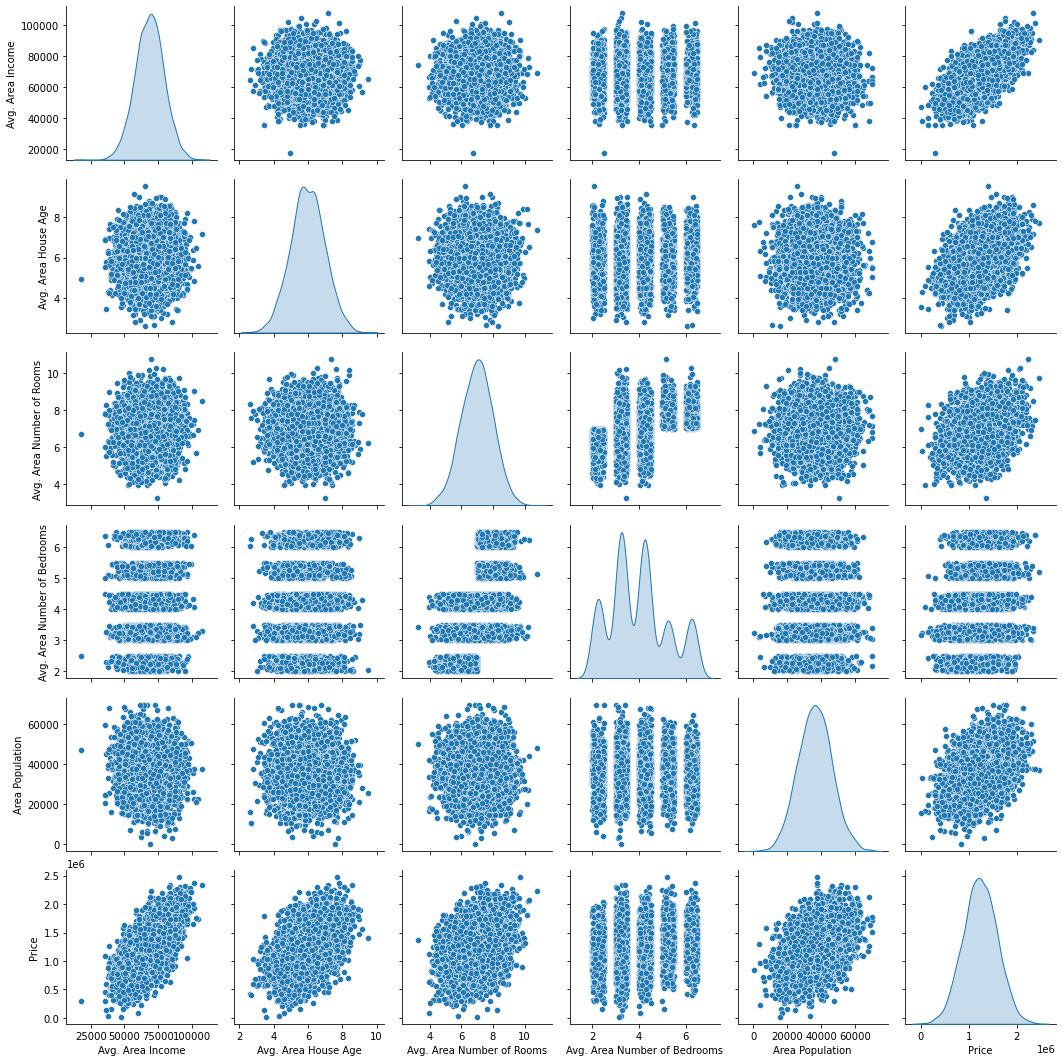

In [16]:
sns.pairplot(df,diag_kind='kde')  # It is drawn for numerical data for correlation 

<AxesSubplot:ylabel='Frequency'>

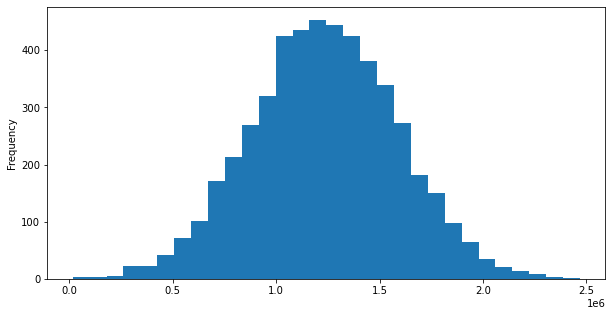

In [17]:
df['Price'].plot.hist(bins=30,figsize=(10,5))  # Histogram is to see the distribution of price data

<AxesSubplot:ylabel='Density'>

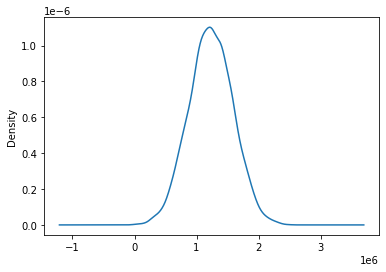

In [18]:
df['Price'].plot.density()   

In [19]:
df.corr()     # to find correlation

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

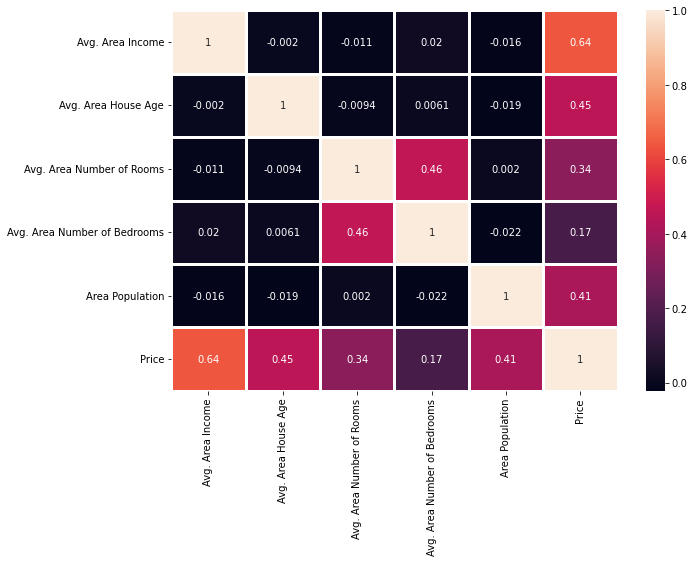

In [20]:
plt.figure(figsize=(10,7))         # Heat map of correlation matrix
sns.heatmap(df.corr(),annot=True,linewidths=3)

In [21]:
X = df.drop(['Price','Address'], axis=1)  # x axis contain independent data and y axis contain dependent variable (price)
y = df[['Price']]

In [22]:
from sklearn.model_selection import train_test_split     # import of train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)   #training data is 70%

In [24]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 5)
Variable set size: (5000, 1)


In [25]:
print("Train set size of X:",X_train.shape)
print("Train set size of y:",y_train.shape)

Train set size of X: (3500, 5)
Train set size of y: (3500, 1)


In [26]:
print("Test set size of X:",X_test.shape)
print("Test set size of Y:",y_test.shape)

Test set size of X: (1500, 5)
Test set size of Y: (1500, 1)


In [27]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [28]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [29]:
from sklearn.linear_model import LinearRegression      # linear regression model is used
from sklearn import metrics

In [30]:
lm = LinearRegression() # Creating a Linear Regression object 'LRM'

In [31]:
lm.fit(X_train,y_train) # Training of data using LRM

LinearRegression()

In [32]:
print("The intercept term of the linear model:", lm.intercept_)   

The intercept term of the linear model: [-2645289.86434367]


In [33]:
print("The coefficients of the linear model (Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population):", lm.coef_)    

The coefficients of the linear model (Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population): [[2.16398550e+01 1.65729214e+05 1.20958349e+05 1.94909254e+03
  1.52262240e+01]]


In [34]:
train_pred = lm.predict(X_train)

In [35]:
metrics.mean_squared_error(y_train,train_pred)

10073302615.620255

In [36]:
test_pred = lm.predict(X_test)

In [37]:
metrics.mean_squared_error(y_test,test_pred)

10567448570.930979

In [38]:
metrics.mean_absolute_error(y_train,train_pred)

80766.33844241669

In [39]:
np.sqrt(metrics.mean_squared_error(y_train,train_pred))

100365.84386941732

In [40]:
predictions = lm.predict(X_test)                # Prediction using the LRM
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500, 1)


In [41]:
predictions

array([[1555151.93144969],
       [1583399.08583432],
       [ 941481.35482434],
       ...,
       [1099846.27252109],
       [ 974837.76044627],
       [1731306.80613941]])

In [44]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 82745.90894156005
Mean square error (MSE): 10567448570.930979
Root mean square error (RMSE): 102798.09614448596


#### R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's 
#### explained by an independent variable or variables in a regression model.

In [46]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.917
